Why did I choose to study the SPY ETF ? 

-> SPY is designed to track the performance of the S&P 500 Index. Its price movements closely mirror the index's behavior, making it a reliable substitute.


-> SPY is the most liquid ETF in the world, with an average daily trading volume exceeding 80 million shares (as of 2024).


-> SPY is one of the largest ETFs globally, with over $400 billion in assets under management, reflecting its popularity among institutional and retail investors.

In [1]:
import pandas as pd

In [2]:
speaker_list = [ 'Vice Chair Janet L. Yellen', 'Governor Sarah Bloom Raskin', 'Governor Jeremy C. Stein', 'Governor Jerome H. Powell', 'Chairman  Ben S. Bernanke', 'Governor Lael Brainard', 'Chair Janet L. Yellen', 'Vice Chairman Stanley Fischer', 'Vice Chairman for Supervision Randal K. Quarles', 'Chairman Jerome H. Powell', 'Vice Chairman Richard H. Clarida', 'Chair Jerome H. Powell', 'Vice Chair Richard H. Clarida', 'Vice Chair for Supervision Randal K. Quarles']

In [3]:
from twelvedata import TDClient
td = TDClient(apikey="ce7c5d1412ff42d1a2ca90e47bd3105f")

-> importiamo le repository : timestamping, asset, memoryhandling 

In [4]:
import pandas as pd
import pytz
import re
from libs.helpermodules import memory_handling as mh

In [5]:
filename = 'fedspeeches_preprocessed.pkl'
helper = mh.PickleHelper.pickle_load(filename)
df = helper.obj
df = df[df['speaker'].isin(speaker_list)]

In [6]:
df

,date,speaker,title,link,text,timestamp,text_by_minute
6895,2010-12-01,Vice Chair Janet L. Yellen,Fiscal Responsibility and Global Rebalancing,/newsevents/speech/yellen20101201a.htm,Good morning. Thank you for inviting me to be ...,2010-12-01 10:00:00-05:00,Good morning. Thank you for inviting me to be ...
6896,2010-12-01,Vice Chair Janet L. Yellen,Fiscal Responsibility and Global Rebalancing,/newsevents/speech/yellen20101201a.htm,Good morning. Thank you for inviting me to be ...,2010-12-01 10:01:00-05:00,the federal budget is an essential but formida...
6897,2010-12-01,Vice Chair Janet L. Yellen,Fiscal Responsibility and Global Rebalancing,/newsevents/speech/yellen20101201a.htm,Good morning. Thank you for inviting me to be ...,2010-12-01 10:02:00-05:00,budget deficit seems to have topped out. So lo...
6898,2010-12-01,Vice Chair Janet L. Yellen,Fiscal Responsibility and Global Rebalancing,/newsevents/speech/yellen20101201a.htm,Good morning. Thank you for inviting me to be ...,2010-12-01 10:03:00-05:00,"boomers have retired in 2030, and further incr..."
6899,2010-12-01,Vice Chair Janet L. Yellen,Fiscal Responsibility and Global Rebalancing,/newsevents/speech/yellen20101201a.htm,Good morning. Thank you for inviting me to be ...,2010-12-01 10:04:00-05:00,"budget will be on an unsustainable path, with ..."
...,...,...,...,...,...,...,...
23747,2024-04-03,Chair Jerome H. Powell,Opening Remarks,/newsevents/speech/powell20240403a.htm,It is a pleasure to be here today. I will begi...,2024-04-03 10:27:00-04:00,in a democracy but are especially important fo...
23748,2024-04-03,Chair Jerome H. Powell,Opening Remarks,/newsevents/speech/powell20240403a.htm,It is a pleasure to be here today. I will begi...,2024-04-03 10:28:00-04:00,answer any and all questions that are on the m...
23749,2024-04-03,Chair Jerome H. Powell,Opening Remarks,/newsevents/speech/powell20240403a.htm,It is a pleasure to be here today. I will begi...,2024-04-03 10:29:00-04:00,relevant to the economy but are not within our...
23750,2024-04-03,Chair Jerome H. Powell,Opening Remarks,/newsevents/speech/powell20240403a.htm,It is a pleasure to be here today. I will begi...,2024-04-03 10:30:00-04:00,"seek to be, climate policymakers.In short, doi..."


In [7]:
timelist = df.date.unique().tolist()
timelist= sorted(timelist)

PROBLEM : Datas are only available for the last 4 years

In [8]:
i=350

In [9]:
start = df[df.date == timelist[i]].timestamp.min() 
end = df[df.date == timelist[i]].timestamp.max() 

Timedeltas :

-> I consider 3 timedeltas : 20min prior the speech, during the speech (colored in red), 20 mins after the speech , to see the minutely trading behaviour and calculate eventual momentums

-> between 2 successive speeches (ABORTED , speeches could be very close to each other, making it hard to isolate impacts)

-> 1 month before and 1 month after the speech (colored in green) , highlighting in red all the speeches, to see macro behaviour and changes



In [10]:
import matplotlib.pyplot as plt

In [11]:
start_delta20mins = start -pd.Timedelta(minutes=20)
end_delta20mins = end +pd.Timedelta(minutes=20)

In [12]:
ts_delta20mins = td.time_series(
    symbol='SPY',
    start_date=start_delta20mins, #up to 20 mins prior
    end_date=end_delta20mins, #to 20 mins later
    interval='1min',
    outputsize=100
   
).as_pandas()

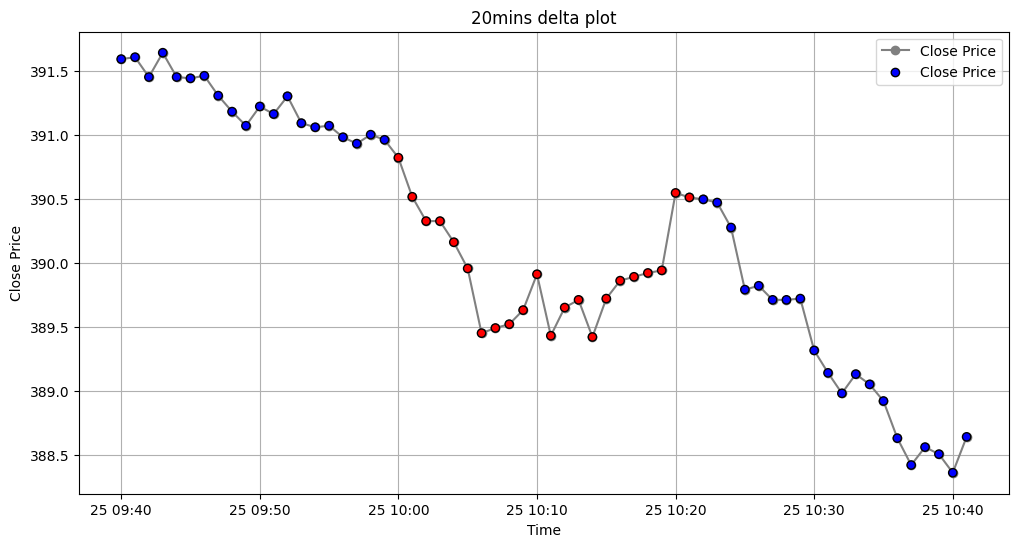

In [13]:
# Extract close prices and corresponding times
times = ts_delta20mins.index
starttz = start.tz_localize(None)
endtz = end.tz_localize(None)
close_prices = ts_delta20mins['close']

# Determine the colors for the points
colors = ['red' if starttz <= t <= endtz else 'blue' for t in times]


# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(times, close_prices, marker='o', linestyle='-', color='gray', label='Close Price')  # Line with dots
plt.scatter(times, close_prices, c=colors, label='Close Price', edgecolors='black', zorder=5)  # Overlay scatter
plt.title('20mins delta plot')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

In [217]:
'''start_intraspeech = df[df.date == timelist[i-3]].timestamp.max()
end_intraspeech = df[df.date == timelist[i+5]].timestamp.min() '''

In [218]:
'''if (end_intraspeech - start_intraspeech)> pd.Timedelta(days=15):
    print('yes')
else:
    print('no')'''

yes


In [219]:
'''ts_intraspeech = td.time_series(
    symbol='SPY',
    start_date=start_intraspeech, #up to 20 mins prior
    end_date=end_intraspeech, #to 20 mins later
    interval='1day',
    outputsize=100
   
).as_pandas()'''

In [ ]:
'''# plot after the speech and before the next one 
times = ts_intraspeech.index

start2 =start.normalize()
start2 = start2.tz_localize(None)

close_prices = ts_intraspeech['close']

colors = ['red' if t == start2 else 'blue' for t in times]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(times, close_prices, marker='o', linestyle='-', color='gray', label='Close Price')  # Line with dots
plt.scatter(times, close_prices, c=colors, label='Close Price', edgecolors='black', zorder=5)  # Overlay scatter
plt.title('intraspeech delta plot')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()'''

In [14]:
start_delta1month = start - pd.Timedelta(days=30)
end_delta1month = end + pd.Timedelta(days=30)

In [15]:
ts_delta1month = td.time_series(
    symbol='SPY',
    start_date=start_delta1month, #up to 20 mins prior
    end_date=end_delta1month, #to 20 mins later
    interval='1day',
    outputsize=100
   
).as_pandas()

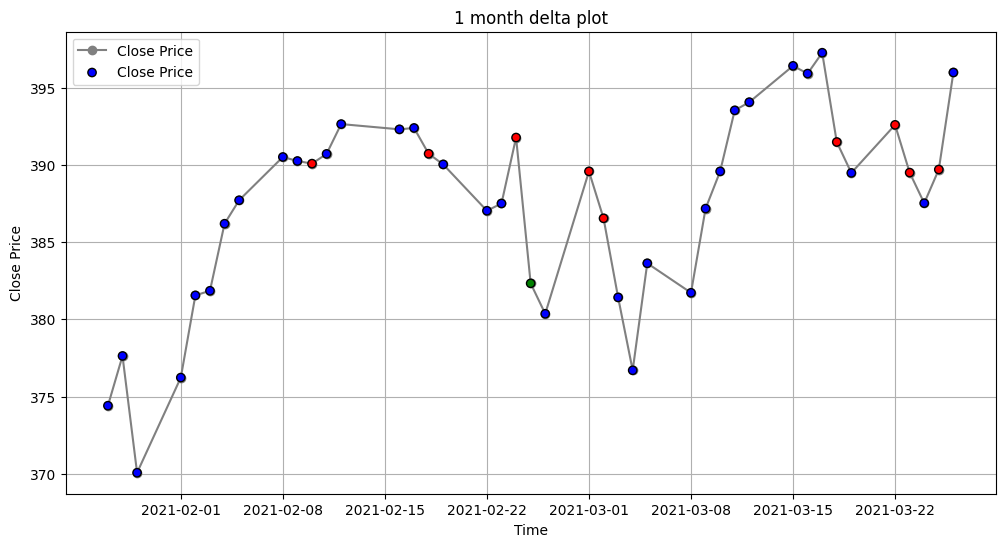

In [17]:
# plot after the speech and before the next one 
times = ts_delta1month.index

start2 =start.normalize()
start2 = start2.tz_localize(None)

close_prices = ts_delta1month['close']

colors = ['green' if t == start2 else ('red' if t in timelist else 'blue') for t in times]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(times, close_prices, marker='o', linestyle='-', color='gray', label='Close Price')  # Line with dots
plt.scatter(times, close_prices, c=colors, label='Close Price', edgecolors='black', zorder=5)  # Overlay scatter
plt.title('1 month delta plot')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

IDEAS AND PROBLEMS : 

-> Speeches tend to be very close one to each other, making it hard to understand and isolate eventual singular impacts --> could be cool to graphically represent the sentiment score via stronger colors and bigger width ( e.g. 1 = big dot, vivid green , 0 =small dot, almost transparent, -1= big dot, vivid red)

-> we can only retrieve datas up to 4 years prior -> maybe the premium API could solve this problem

-> understand what to calculate and take into studying for our analysis (volatility during the speech, percentage change of volatility pre and after speeches, momentum change pre-after speeches, percentage change of average close price pre and after speeches...) 

-> find a way to calculate the accuracy of the timestamps (usually speeches are introduced by a presentation, do they influence the starting time? ) 

-> Could be cool to train an algo via linear regression/svm... to take into analysis [the speaker name, the speech sentiment, the speech length, the momentum and volatility pre speech, etc ] and try to compute a possible momentum/volatility change/interval (still to be defined)
